# Social Media Mining: Evaluation
### Vincent Malic - Spring 2018

## Model Evaluation
* Use scikit-learn for simple and multiple regression as well as classification using k-Nearest Neighbors. 
* Set of training data $\mathbf{X} \in \mathbb{R}^{(n \times d)}$ where $n$ is number of samples and $d$ is number of attributes/features. 
* Set of labels or target values $\mathbf{y} \in \mathbb{R}^{n}$ that represent the value we want to predict the model. 
* Initialize a new, empty scikit learn model, train it using ``fit``, and fit the model to the data
* Predict the label $y$ for a new, unseen set of features. 

### How well does the model represent the relationship in the data?
* Related to concepts of generalizability and overfitting. 
* Several metrics used for quantifying model performance. 

## Goal of Generalizability
* Trained model's ability to perform well on new, unseen data. 
* Want model to explains relation between **all potential** data points, not *just* the data points in the training set. 

## Problem of Overfitting
* Model fit to training set does not reflect actual relation between IV, DV.
* Test how well a model generalizes to new **unseen data**. 
* If the model is does not generalize, it may overfit training data.

## Train-Test Split
* We divide the into training set and test set ("unseen data") 
* Dataset has 1000 data points, and we use 80%/20% train-test split 
* Randomly sample 80% of the data points (800) provides training data. 
* Remaining 20% (200 points) will be the test data.

### Use Synthetic Dataset on Heights, Weights
* Same data we worked with in the Simple Linear Regression notebook.  
* Use LinearRegression package from linear-model library
* Set random seed

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.ioff()

np.random.seed(3057)
heights = np.random.normal(113, 20, 1000)
noise = np.random.normal(0, 5, 1000)
weights = 25.39 + .34 * heights + noise
heights = heights.reshape(-1, 1)
weights = weights.reshape(-1, 1)

## Use Train-Test method in Scikit-learn
* Fit the model on the training set. 
* Make predictions on the "unseen" test set.
* If model predicts test set well, it should perform well on test data

#### Import ``train_test_split`` from ``sklearn.model_selection``.

In [2]:
from sklearn.model_selection import train_test_split

### Three Arguments provides 4 return values 
* `training data`, `training labels`, proportion of data allocated to test set
* `training set data`, `test set data`, `training set labels`, `test set labels`. 
* Use tuple assignment to capture return values of function in variables with intuitive names.

### Split data into train and test sets. 
* Training set has 800 samples, the test set has 200 samples. 
* Fit the model to the training data 

In [3]:
heights_train, heights_test, weights_train, weights_test = train_test_split(heights, weights, test_size=0.2)

In [4]:
print(heights_train.shape)
print(heights_test.shape)

(800, 1)
(200, 1)


## Fit model to Training set
* Initialize empty linear regression model
* Pass the training data for height_train and weight_train features
* Create scatterplot to show the relationship

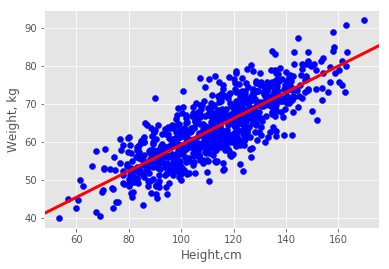

In [6]:
lr = LinearRegression()
lr.fit(heights_train, weights_train)

fig, ax = plt.subplots()
ax.set_xlabel("Height,cm")
ax.set_ylabel("Weight, kg")
ax.scatter(heights_train, weights_train, color="blue")
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax], [lr.predict(xmin)[0][0], lr.predict(xmax)[0][0]], linewidth=3, color="red")
ax.set_xlim([xmin, xmax])
fig

This plot may look similar to the one in the first notebook, but there are only 800 data points here, not 1000. 200 have been set aside in the test set. The red line - the model - is only trained on the 800 data points in the training set. 


## Use Predict method to test model with Test set
* See how well model performs on the unseen test data, ``heights_test``, ``weights_test``. 
* Ask model to predict weights given the heights in ``heights_test``
* Compare predicted weights to the actual weights in ``weights_test``. 

In [7]:
weights_predicted = lr.predict(heights_test)
print(weights_predicted[:5])
print('*'*50)
print(weights_test[:5])

[[ 65.22902827]
 [ 64.75584824]
 [ 70.31820014]
 [ 59.34266733]
 [ 65.39356362]]
**************************************************
[[ 74.37035378]
 [ 66.80354693]
 [ 68.55201111]
 [ 67.91885942]
 [ 65.92296377]]


The model predicted that...
* For the first datapoint in the test data, the model predicts the first alien will weigh 65.23 kg, but in reality, the first alien weights 74.37.
* For second datapoint, weights 64.76, but in reality the second weighs 66.80. On one hand, there are some differences; on the other hand, the predictions aren't too shabby. 

#### How can we quantify this difference?

# Mean Squared Error
* Difference between the value predicted by the model and the actual value is known as the *residual* or *error*. 
* Good model should have small residuals - i.e., predictions close to reality. 

### Average the Sum of Squared Deviations
* For each data point in the test set, take the error (the difference between prediction and reality) and square it. 
* Squaring each difference scores (above mean, below mean), remove positive, negative values 
* We want a measure of distance from prediction, how *far* each point is from regression line 
* Sum and take average across all data points, divide by square root of n
* MSE provides single value that represents ``quality`` of the model. Lower is better.

### Use Scikit learn method to obtain mean squared error of model for test data

In [8]:
from sklearn.metrics import mean_squared_error

### ``mean_squared_error`` method takes two arguments:
* First, provide the true values for each data point: in our case, the true weights in the dataset. 
* Then, provide the *predicted* values for each datapoint: in our case, the weights predicted by the model when we input the test heights. 

In [9]:
MSE = mean_squared_error(weights_test, weights_predicted)
MSE

22.109118875692197

In [10]:
np.sqrt(MSE)

4.7020334830466908

The mean squared error on the test data is 22.11. That means that on average, the predicted weights were $\sqrt{22.11} = 4.70$ kg away from the actual value. Not bad! Remember, this is on the test data, so the model didn't see this data during training.

# R Squared

So, the MSE on the test data is 22.11. So what? Is that good or bad? We have one number in a vacuum, it's not very helpful. It would be more helpful if we could compare 22.11 to something else. It would be helpful if there were some sort of *baseline* against which we can say our model performed "better" or "worse." What's a good baseline?

In regression, the most commonly used baseline is simply the average value of the dependent variable. 

## Imagine a really naive, unsophisticated model 
* Model simply outputs the *average value of all the weights* every time, no matter what height you give it. 
* If weights are normally distributed, then most of the weights will be near the average. Here's how such a "model" would look: 

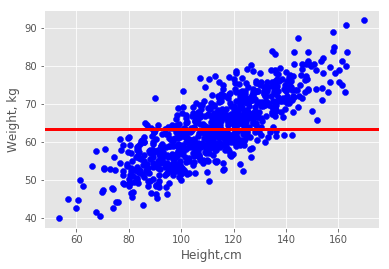

In [13]:
fig.clf()
ax = fig.add_subplot(111)
ax.set_xlabel("Height,cm")
ax.set_ylabel("Weight, kg")
ax.scatter(heights_train, weights_train, color="blue")
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax], [np.mean(weights_train), np.mean(weights_train)], linewidth=3, color="red")
ax.set_xlim([xmin, xmax])
fig

As you can see, such a model would perform poorly on estimating the weights of the tallest and shortest aliens, but for aliens that are average height (e.g., most of them) then guessing the average weight is not too far off. 

### Naive model provides a baseline. 
* Guessing the mean is an unsophisticated model that requires only a single calculation. 
* If our model does better than this, good. If not, then there's no reason not to use the mean as a model. 

## The Coefficient of determination $R^2$. 
* The value of $R^2$ is one minus the MSE of the model divided by the MSE of the mean. 
* If $R^2$ equals 0, then your model is doing no better than the mean. 
* If it greater than 0, your model is doing better than the mean. 
* If $R^2$ is equal to 1, it means your model is perfect - so we'll never see this. 

### Use scikit learn  $R^2$score method to obtain $R^2$

In [15]:
from sklearn.metrics import r2_score

### Arguments for ``r2_score`` 
* ``r2_score`` takes the true values and predicted values as its argument.

In [16]:
r2 = r2_score(weights_test, weights_predicted)
print(r2)

0.656153105061


With $R^2 = 0.66$, we know our model performs significantly better than guessing the average. It's not a value of 1, but as I said, no model is perfect so that's not the value we're expecting. 

# Evaluating Classifiers

### For Regression models...
* In regression we're predicting a continuous number 
* Calculate MSE and R squared for the test set when we're making 

### For Classification models...
* In classification, we're predicting a discrete variable, label, category, or class, 
* Using example of k-NN classifier for the iris data, with train-test split. 
* Fit model on the train data and evaluate on the test data. ($k = 5$) 

In [17]:
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

Let's divide the data in to training and testing sets, using sklearn's handy method. I'm going to make the test size a little bigger: one third of the data we have. 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
print(X_train.shape)
print(X_test.shape)

(100, 2)
(50, 2)


There are 100 instances in the training set and 50 instances in the test set. 

In [24]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
### Plot Classifier Decision Boundary

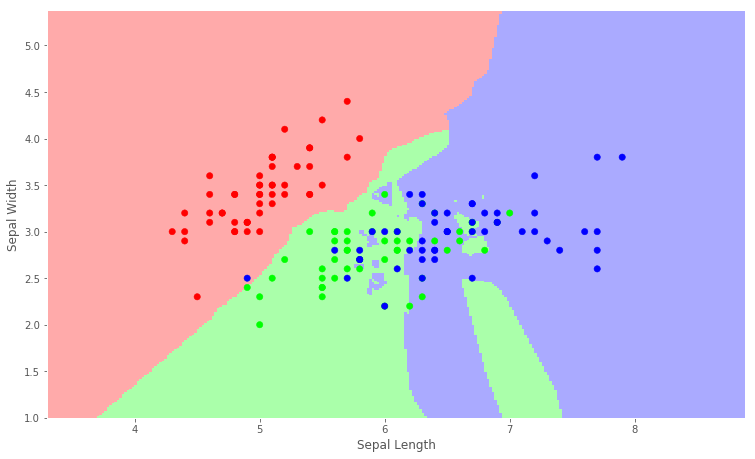

In [19]:
fig.clf()
ax = fig.add_subplot(111)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, s=40)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
fig.set_size_inches(12.5, 7.5)
fig

Using the classifier's ``predict`` method, let's see what labels the classifier would assign to the *unseen* test data. 

In [21]:
y_predicted = clf.predict(X_test)
y_predicted[:50]

array([0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 1, 2,
       0, 0, 2, 0])

In [26]:
y_test[:50]

array([0, 1, 0, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 1, 1,
       2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2,
       0, 0, 2, 0])

# Accuracy
* Compare predicted labels model generated for test data to the true labels 
* Metric of classifer performance: percentage of samples correctly classified
* scikit learn method takes true labels and predicted labels as arguments 

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)

0.82


#### Model accuracy is 82%, 
* The model correctly classified 41 out of 50 samples in test

### What is baseline for comparison? 
* Imagine "dummy classifier" that guesses entirely at random. 
* With 3 labels to choose from, a random classifier may be right 1/3rd of the time (33%) 
* Observed model accuracy of 0.82, is better than random baseline of 0.33.

# Confusion Matrix

* Confusion matrix has 3 rows and 3 columns - 1 for each of the labels in the test set
* Each of rows and columns represent iris species: I. setosa, I. versicolor, I. virginica, 
* The rows represent the TRUE labels and columns represent PREDICTED labels.

In [23]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_predicted))

[[20  0  0]
 [ 0 11  4]
 [ 1  4 10]]


### Interpretation of Confusion Table
* Row 1, column 1: model assigned 20 samples the label *Setosa*, with true label *Setosa*. 
* Row 3, column 1: model predicted 1 sample as *Setosa*, whose true label was *Virginica*. 
* Values on the diagonal of matrix represent **correct classifications**.

## Misclassification Errors
* 4 *Versicolor* flowers incorrectly labeled as *Virginica*. 
* 4 *Virginica*. flowers incorrectly labeled as *Versicolor* 
* 1 *Virginica*. flowers incorrectly labeled as *Setosa* 

# Precision and Recall
* 15 instances of *Virginica* in test data - this is the sum of the third row
* 10 correctly classified, 4 classified as *Versicolor*, 1 as *I. Setosa*

## False positives and True negatives
* True Positive: sample classified as *Virginica* and true label *Virginica*. 
* False Positive: sample classified as *Virginica* but true label was *not* *Virgnica*. 
* True Negative: item NOT classified as *Virgnica*, and true label was also not *Virgnica*. * * False Negative: sample NOT classified as *Virginica*, but true label is *Virgniica*. 

### Goal: maximize TRUE pos/neg and minimize FALSE pos/neg 
For this sample of *Virginica*, there are:
* 10 true positives
* 4 false positives
* 31 true negatives
* 5 false negatives

## Calculate model's *Precision* for *Virginica*. 
* Of all instances labeled as *Virgnica*, how many were *actually* *Virgnica*?
* Number of true positives, divided by number of true positive and false positives:

$$\frac{\text{TP}}{\text{TP+FP}}$$

## Calculate model *Recall* for *Virginica*. 
* Of all instances *actually* *Virginica*, how many correctly labeled as *Virginica*?
* Number of true positives, divided by number of true positives and false negatives
* How good is the coverage of the model?

$$\frac{\text{TP}}{\text{TP}+\text{FN}}$$


### Precision and Recall often at odds. 
* Typically have high precision and low recall, or the other way around. 

### Careful classifier model 
* Only labels something as *Virginica* if it's very sure. 
* Has **high precision**, because of the ones it labeled, both were right. 
* But **low recall**, overly cautious it missed many true instances of *I. virginica*.

### Dumb classifier model
* :abels **everything** as *I. virginica*.
* Has **high recall** - it correctly identified *every* instance of *I. virgnica* in the set. * But **low precision** - of all instances labeled *I. virginica*, many were wrong. 

As always, scikit-learn has built-in methods for getting precision and recall. 

In [28]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### NOTE: precision and recall can be calculated *only with respect to a given label*. 
* In the example above, recall and precision with respect to label 2, *I. virginica*. 

## Function arguments and parameters
* Functions take as arguments: true labels for test set, predicted labels, average (none)
* Functions will return 3 values, recall or precision with respect to *each label*. 
* Providing a value of ``None`` to `average` parameter suppresses some of more complicated behavior this function can do. 

In [29]:
precision = precision_score(y_test, y_predicted, average=None)
print(precision)

[ 0.95238095  0.73333333  0.71428571]


In [30]:
recall = recall_score(y_test, y_predicted, average=None)
print(recall)

[ 1.          0.73333333  0.66666667]


Here, we can see that the classifier performed most poorly with the 3rd label, *I. virginica*. 

The precision was 0.71: of the instances that the classifier labeled *I. virginica*, only 71% of them were actually *I. virginica*. 

The recall was 0.67: of *all* the instances of *I. virginica*, it only correctly labeled 67% of them. 

In [38]:
np.mean(precision)

0.79999999999999993

In [40]:
precision_score(y_test, y_predicted, average="macro")

0.79999999999999993

We can take the average of prediction scores across label categories, or we can indicate the weighted average using the precision_score method. 

In [35]:
precision_score(y_test, y_predicted, average="weighted")

0.81523809523809521

# F1 Score
* F1 metric combines both precision and recall, as a harmonic mean 
* Frequently used as a way to evaluate classifiers. It's calculated as follows:

$$ F_1 = 2 \cdot \frac{\text{precision}\cdot\text{recall}}{\text{precision}+\text{recall}}$$

As usual, we can use scikit-learn:

In [31]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predicted, average=None)

array([ 0.97560976,  0.73333333,  0.68965517])

This provides the F1 score for *each* category. Finally, to zero in on 1 single number to represent the quality of the classifier, we can get the *weighted average* of each of these F1 scores. It's *weighted* because in many situations you don't want to count the F1 scores equally, particularly since the distribution of labels may not be uniform.

In [37]:
f1_score(y_test, y_predicted, average="macro")

0.7995327539482292

In [36]:
f1_score(y_test, y_predicted, average="weighted")

0.81714045416316228

F1 scores range from 0 to 1. It turns out here that the F1 score I got was quite similar to the accuracy in general, but keep in mind that this isn't always the case. 

Much research published nowadays report F1 scores to demonstrate how effective their methods are, so I highly recommend using F1 scores on your final project if your developing a classifier. 